<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/LinearSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from mlxtend.plotting import category_scatter
import pandas as pd
import numpy as np

In [2]:
# 1. toy dataset 생성
X, y = datasets.make_blobs(random_state=42)

In [4]:
# 2. 데이터 프레임으로 만들기
df = pd.DataFrame(X, columns=['feature0', 'feature1'])
df['class'] = y
df.head()


,feature0,feature1,class
0,-7.726421,-8.394957,2
1,5.453396,0.742305,1
2,-2.978672,9.556846,0
3,6.042673,0.571319,1
4,-6.521840,-6.319325,2


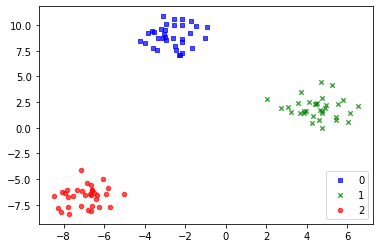

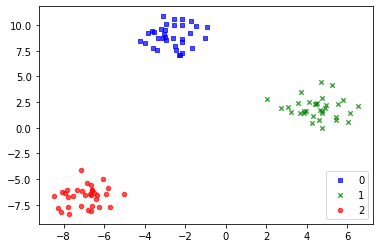

In [6]:
# 3. 그래프 확인
category_scatter(x='feature0', y='feature1', label_col='class',data=df,legend_loc='lower right')

In [7]:
# 4. 모델링
linear_svm=LinearSVC().fit(X,y) # C=1.0

In [8]:
# 5.1 클래스별 계수 확인
linear_svm.coef_

array([[-0.17492445,  0.23140925],
       [ 0.47621511, -0.06937382],
       [-0.18914569, -0.20399698]])

In [9]:
# 5.2 클래스별 절편
linear_svm.intercept_


array([-1.07745546,  0.13140242, -0.08604893])

In [10]:
# 그래프

import matplotlib.pyplot as plt


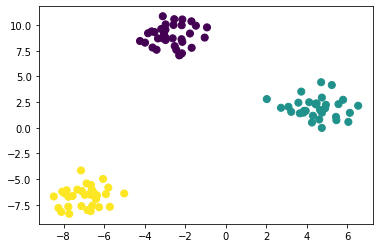

In [11]:
line = np.linspace(-15, 15) # 지정된 간격 동안 균일 한 간격의 숫자를 반환합니다.

fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1],c = y, s = 50)

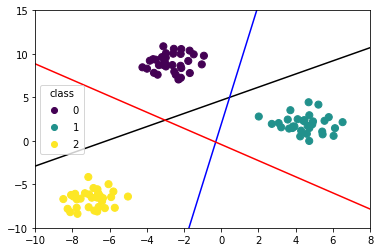

In [14]:
import matplotlib.pyplot as plt

line = np.linspace(-15, 15) # 지정된 간격 동안 균일 한 간격의 숫자를 반환합니다.

fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1],c = y, s = 50)

for coef, intercept, color in zip(linear_svm.coef_,
                                 linear_svm.intercept_,
                                 ["black","blue","red"]):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c = color)
    ax.set_ylim(-10, 15)
    ax.set_xlim(-10, 8)
    ax.legend(*scatter.legend_elements(), loc = "best", title = "class")


In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.linspace(-3,3, 50)

- 그래프에서 보이는 선은 선형 결정 경계로 소프트 벡터 머신에서 중요하게 생각하는 것이다.

- 넓은 마진(두 데이터 포인터와 경계가 떨어진 정도)을 가지는 것이 안정적이며, 모든 클래스를 구분할 수 있어야 한다. 



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVC Decision Region Boundary')

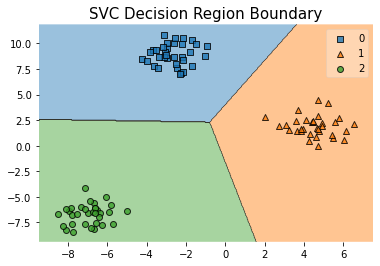

In [22]:
from mlxtend.plotting import plot_decision_regions

# 최종 그래프 확인
plot_decision_regions(X=X, y=y, clf=linear_svm )
plt.title('SVC Decision Region Boundary', size=15)